In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime

from src.data import io
from src.visualization import visualize

In [4]:
species = "Corn"
data_dir = pathlib.Path("../data/processed")
train_dir = data_dir.joinpath(species)
model_dir = pathlib.Path("../models")
metadata_file_path = train_dir.joinpath("metadata.json")

print(f"species: {species} - train_dir: {str(train_dir)} - metadata_file_path: {str(metadata_file_path)}")

species: Corn - train_dir: ../data/processed/Corn - metadata_file_path: ../data/processed/Corn/metadata.json


In [5]:
metadata = io.read_metadata(str(metadata_file_path))
model_id = metadata["id"]

print(f"model_id: {model_id}")

model_id: f2fe0505-be44-4162-be1a-2f9258fb4537


## Training

In [6]:
from src.models.train_model import train, load_dataset

In [18]:
start_time = datetime.utcnow().strftime("%Y-%m-%d__%H_%M")
batch_size = 32
epochs = 20
monitor = "val_loss"

In [19]:
classifier, history, _ = train(str(train_dir), str(model_dir), batch_size, epochs, monitor, start_time)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 64)       

## Evaluation

In [20]:
model_metadata_file_path = model_dir.joinpath(model_id, start_time, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))

In [21]:
model_metadata

{'id': 'f2fe0505-be44-4162-be1a-2f9258fb4537',
 'created_date': '2020-01-26 21:22:59',
 'arguments': {'batch_size': 32, 'epochs': 20, 'monitor': 'val_loss'},
 'dataset': {'id': 'f2fe0505-be44-4162-be1a-2f9258fb4537',
  'species': 'Corn',
  'num_classes': 4,
  'class_names': ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
   'Corn_(maize)___Common_rust_',
   'Corn_(maize)___Northern_Leaf_Blight',
   'Corn_(maize)___healthy'],
  'created_date': '2020-01-26 05:25:25',
  'file_counts': {'train': 1517, 'test': 506, 'eval': 506}},
 'history': {'loss': [0.7604209910681907,
   0.35651423385802733,
   0.26838821838510796,
   0.22030042524033405,
   0.15777843936960748,
   0.11028654556325142,
   0.10065055000001287,
   0.06518657439130734,
   0.07169356938213745,
   0.034776758384318686,
   0.02370261672292551,
   0.0353234611919764],
  'accuracy': [0.7367021441459656,
   0.8344414830207825,
   0.8723404407501221,
   0.9015957713127136,
   0.936170220375061,
   0.9541223645210266,
   0.9

In [12]:
history = model_metadata["history"]

In [22]:
metrics_df = visualize.create_metrics_dataframe(history.history)

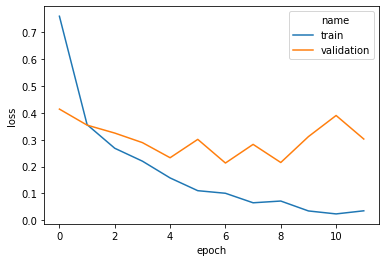

In [23]:
loss_plot = visualize.learning_curves("loss", metrics_df)

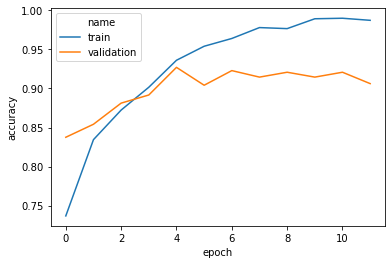

In [24]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)